In [1]:
import numpy as np
import cv2 as cv
import os
from matplotlib import pyplot as plt
import tarfile
import shutil
import numpy as np

import tensorflow as tf

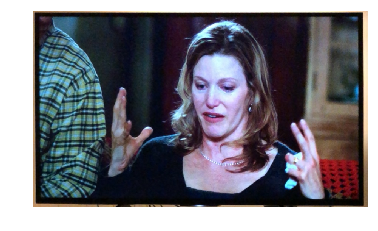

In [4]:
filename_queue = tf.train.string_input_producer(['../../data/laurent_zip_files/files/imageA.jpeg']) #  list of files to read

reader = tf.WholeFileReader()
key, value = reader.read(filename_queue)

my_img = tf.image.decode_jpeg(value) # use png or jpg decoder based on your files.

init_op = tf.initialize_all_variables()
sess = tf.InteractiveSession()
with sess.as_default():
    sess.run(init_op)

# Start populating the filename queue.
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord)

for i in range(1): #length of your filename list
  image = my_img.eval() #here is your image Tensor :) 

plt.imshow((np.asarray(image)))
plt.axis('off')
plt.show()

coord.request_stop()
coord.join(threads)

(520, 887, 3)


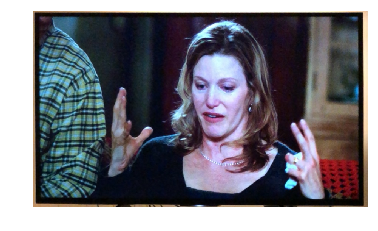

In [6]:
img_path = '../../data/laurent_zip_files/files/imageA.jpeg'
filenames = tf.train.match_filenames_once(img_path)
count_num_files = tf.size(filenames)
filename_queue = tf.train.string_input_producer(filenames)

reader = tf.WholeFileReader()
key, value = reader.read(filename_queue)
image = tf.image.decode_jpeg(value)

init = (tf.global_variables_initializer(), tf.local_variables_initializer())
with tf.Session() as sess:
    sess.run(init)
    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    num_of_files = sess.run(count_num_files)
    for file in range(num_of_files):
        img = image.eval()
        print(img.shape)
        
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [7]:
"""
Being used to print all the numbers in an ndarray
"""
np.set_printoptions(threshold=np.inf)

In [8]:
"""
Given img path, display using matplotlib
"""
def display_image(img, title):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [9]:
"""
Given feature vector, plot them using histogram
"""
def display_hist(values, title):
    plt.hist(values)
    plt.title(title)
    plt.show()

In [29]:
"""
Given image path, load and extract feature vector using pre-trained network
"""
def extract_features_from_vgg(img_path):
    model = tf.keras.applications.VGG16(weights='imagenet', include_top=False)
    #model.summary()

    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224,224))

    image_data = tf.keras.preprocessing.image.img_to_array(img)
    image_data = np.expand_dims(image_data, axis=0)
    image_data = tf.keras.applications.vgg16.preprocess_input(image_data)

    vgg16_feature = model.predict(image_data)
    print(vgg16_feature.shape)
    vgg_flatten = vgg16_feature.reshape(1, 25088)
    print(vgg_flatten.shape)

    display_image(img, 'org image')
    display_hist(vgg_flatten, 'black_image')

(1, 7, 7, 512)
(1, 25088)


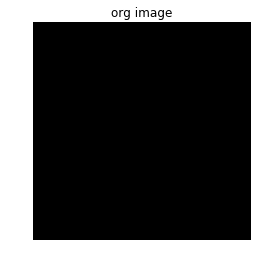

In [ ]:
#display image and extract features from vgg
img_path = '../../data/5454/5.jpg'
extract_features_from_vgg(img_path)

In [11]:
"""
Given image path, get gradients using laplacian, sobel operators and display
"""
def display_img_gradients(path):
    img = cv.imread(path)

    laplacian = cv.Laplacian(img, cv.CV_64F)
    sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
    sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)

    plt.subplot(2,2,1),plt.imshow(img)
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,2),plt.imshow(laplacian)
    plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,3),plt.imshow(sobelx)
    plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,4),plt.imshow(sobely)
    plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

    plt.show()

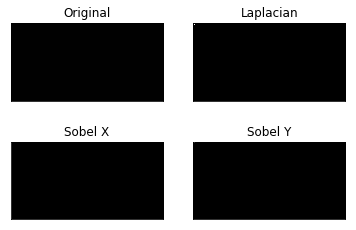

In [13]:
"""
Get image gradients and display them
"""
imgs_path = '../../data/5454/5.jpg'
"""
for fname in os.listdir(imgs_path):
    name, ext = fname.split('.')
    if ext != 'jpg':
        continue
    f_path = imgs_path+fname"""
display_img_gradients(imgs_path)

In [2]:
"""
Extract .tgz files and save in a given path
"""
def extract_tar_file(src_path, dst_path):
    tar = tarfile.open(src_path)
    tar.extractall(dst_path)
    tar.close()

In [3]:
"""
Given image path, get the average of each color channel
"""
def check_mean_of_each_image(path):
    img = cv.imread(path)
    #display_image(img, 'orig image')
    avg_color_per_row = np.average(img, axis=0)
    #print(avg_color_per_row.shape)
    avg_color = np.average(avg_color_per_row, axis=0)
    #print(avg_color.shape)
    return avg_color

In [6]:
"""
Given the frames path which are in a title, dump all the black frames path present in a txt file
"""
def get_title_time_of_black_frames_seg(path):
    f = open('black_frames_data.txt', 'w+')
    for title in os.listdir(path):
        title_path = path + title
        extract_tar_file(title_path, path)
        print(title_path)
        base_str, num_title = title.split('-')
        base, ext = num_title.split('.')
        remove_path = path+base
        for sub_folder in os.listdir(remove_path):
            if '.' in sub_folder:
                continue
            sub_folder_path = remove_path+'/'+sub_folder
            for fname in os.listdir(sub_folder_path):
                file_path = sub_folder_path + '/'+fname
                if 'jpg' in fname:
                    avg_color = check_mean_of_each_image(file_path)
                    if avg_color[0] < 1.2 and avg_color[1] < 1.2 and avg_color[2] < 1.2:
                        #print(sub_folder, file_path)
                        comp_info = sub_folder + ' ' + file_path
                        f.write(comp_info)
                        f.write('\n')
        print(remove_path)
        shutil.rmtree(remove_path)
    f.close()

In [7]:
base_path = '../../data/laurent_zip_files/frames/'
get_title_time_of_black_frames_seg(base_path)

../../data/laurent_zip_files/frames/frames_frames-112209.tgz
../../data/laurent_zip_files/frames/112209
../../data/laurent_zip_files/frames/frames_frames-112218.tgz
../../data/laurent_zip_files/frames/112218
../../data/laurent_zip_files/frames/frames_frames-112203.tgz
../../data/laurent_zip_files/frames/112203
../../data/laurent_zip_files/frames/frames_frames-681.tgz
../../data/laurent_zip_files/frames/681
../../data/laurent_zip_files/frames/frames_frames-112205.tgz
../../data/laurent_zip_files/frames/112205
../../data/laurent_zip_files/frames/frames_frames-28379.tgz
../../data/laurent_zip_files/frames/28379
../../data/laurent_zip_files/frames/frames_frames-665177.tgz
../../data/laurent_zip_files/frames/665177
../../data/laurent_zip_files/frames/frames_frames-112201.tgz
../../data/laurent_zip_files/frames/112201
../../data/laurent_zip_files/frames/frames_frames-28364.tgz
../../data/laurent_zip_files/frames/28364
../../data/laurent_zip_files/frames/frames_frames-166.tgz
../../data/laure

In [12]:
"""
Examine each pixel intensity values
"""
def examine_image_pixels(img_path):
    img = cv.imread(img_path)
    display_image(img, 'orig image')
    avg_color_per_row = np.average(img, axis=0)
    avg_color = np.average(avg_color_per_row, axis=0)
    print(avg_color)
    rows, cols, ch = img.shape
    for i in range(rows):
        for j in range(cols):
            pixel = img[i, j]
            print(pixel)

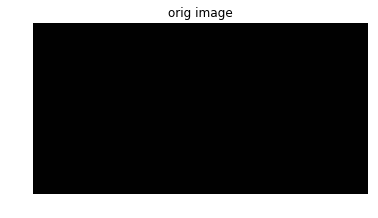

[1. 1. 1.]


In [13]:
img_path = '../../data/laurent_zip_files/frames/frames_frames-166/166/000000/5.jpg'
examine_image_pixels(img_path)